In [2]:
import deap as dp
import array
import random
import json
import pandas as pd
import numpy as np
%matplotlib inline
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [3]:
# gr*.json contains the distance map in list of list style in JSON format
# Optimal solutions are : gr17 = 2085, gr24 = 1272, gr120 = 6942
with open("gr17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]
IND_SIZE = tsp["TourSize"]

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


In [4]:
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

In [5]:
# main() exposed

random.seed(169)

pop = toolbox.population(n=300)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

result_object=algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 40, stats=stats, 
                    halloffame=hof)

gen	nevals	avg   	std    	min 	max 
0  	300   	4700.7	424.386	3606	5842
1  	217   	4359.4	466.872	3045	5763
2  	225   	4047.11	547.587	2128	5844
3  	223   	3656.04	533.586	1759	5306
4  	223   	3222.95	533.003	1498	5048
5  	230   	2806.1 	516.794	1391	4844
6  	247   	2410.9 	469.446	1285	3692
7  	231   	2037.31	403.103	1092	3336
8  	232   	1737.03	342.41 	978 	3179
9  	214   	1498.7 	239.408	786 	2368
10 	228   	1342.43	210.673	589 	2033
11 	235   	1208.05	209.356	565 	1929
12 	213   	1060.5 	199.794	553 	1762
13 	222   	913.953	173.661	530 	1690
14 	228   	808.25 	151.791	445 	1392
15 	229   	696.933	139.376	434 	1384
16 	226   	606.91 	116.144	321 	1295
17 	236   	525.203	94.9994	306 	983 
18 	221   	451.897	70.2185	267 	697 
19 	215   	401.903	61.4701	238 	610 
20 	205   	353.633	51.7185	199 	527 
21 	209   	318.967	51.9054	198 	576 
22 	216   	287.807	46.863 	188 	464 
23 	244   	260.04 	45.8485	162 	454 
24 	219   	232.487	40.8597	130 	450 
25 	231   	210.75 	36.7994	130 	410 
26 	

In [6]:
result_object[1][1]['std']

466.87186035237647

In [7]:
type(result_object[1][1])

dict

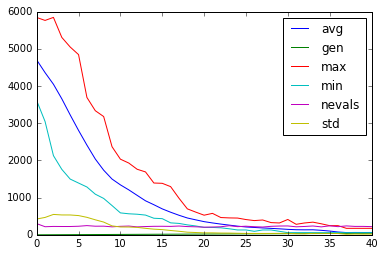

In [8]:
pd.DataFrame(data=result_object[1]).plot()

In [9]:
pd.DataFrame(data=result_object[1]).to_csv

<bound method DataFrame.to_csv of             avg  gen     max     min  nevals         std
0   4700.700000    0  5842.0  3606.0     300  424.385536
1   4359.403333    1  5763.0  3045.0     217  466.871860
2   4047.113333    2  5844.0  2128.0     225  547.587467
3   3656.040000    3  5306.0  1759.0     223  533.586318
4   3222.950000    4  5048.0  1498.0     223  533.002652
5   2806.100000    5  4844.0  1391.0     230  516.794430
6   2410.900000    6  3692.0  1285.0     247  469.445691
7   2037.310000    7  3336.0  1092.0     231  403.102849
8   1737.030000    8  3179.0   978.0     232  342.410167
9   1498.703333    9  2368.0   786.0     214  239.408024
10  1342.430000   10  2033.0   589.0     228  210.673108
11  1208.046667   11  1929.0   565.0     235  209.355689
12  1060.503333   12  1762.0   553.0     213  199.794069
13   913.953333   13  1690.0   530.0     222  173.660678
14   808.250000   14  1392.0   445.0     228  151.791087
15   696.933333   15  1384.0   434.0     229  139.3764

In [10]:
result_object[1][3]

{'avg': 3656.04,
 'gen': 3,
 'max': 5306.0,
 'min': 1759.0,
 'nevals': 223,
 'std': 533.58631766566134}

In [11]:
df = pd.DataFrame().from_dict(result_object[1])

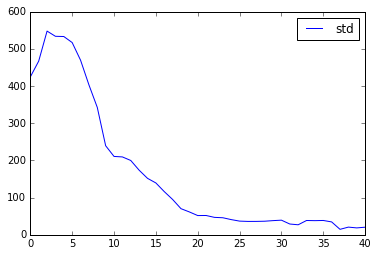

In [12]:
df.plot(y='std')

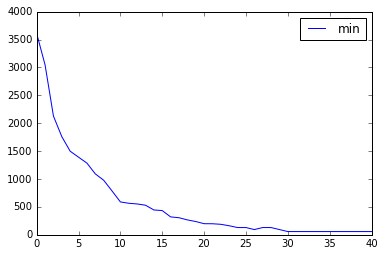

In [13]:
df.plot(y='min')

In [14]:
pop

[array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i', [6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6]),
 array('i'

In [15]:
df.plot?

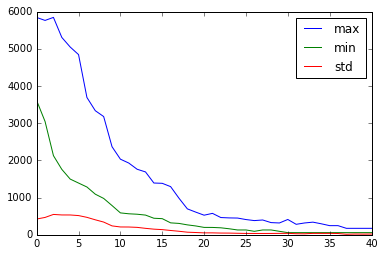

In [16]:
df.plot(y=['max','min','std'])

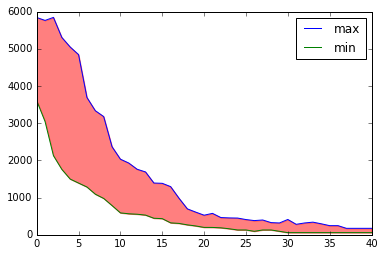

In [17]:
a=df.plot(y=['max','min']).fill_between(xrange(0,41),df['min'],df['max'],color='red',alpha='0.5')


In [18]:
a.fill_between(xrange(0,41),df['min'],df['max'],color='grey',alpha='0.5')

AttributeError: 'PolyCollection' object has no attribute 'fill_between'